<a href="https://colab.research.google.com/github/AkashKarthikeyan/Cardiovascular_Risk_Prediction_Capstone_Project/blob/main/Cardiovascular_Risk_Prediction__Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Required Packages and Reading CSV:** 

In [ ]:
pip install scikit-optimize 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import math
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn import ensemble
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cvrp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Cardiovascular Risk Prediction - SLC/data_cardiovascular_risk.csv')

In [ ]:
cvrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
cvrp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# **Exploratory Data Analysis:** 

## **Treating Null Values:** 

**Checking for the null values:** 

In [ ]:
cvrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Columns to be treated are education, cigsperday, BPMeds, totchol, BMI, heartrate and Glucose.**

In [ ]:
cvrp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

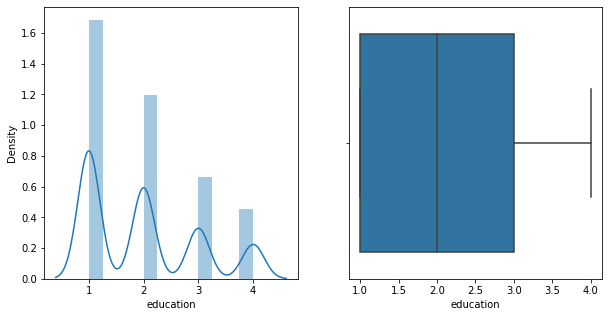

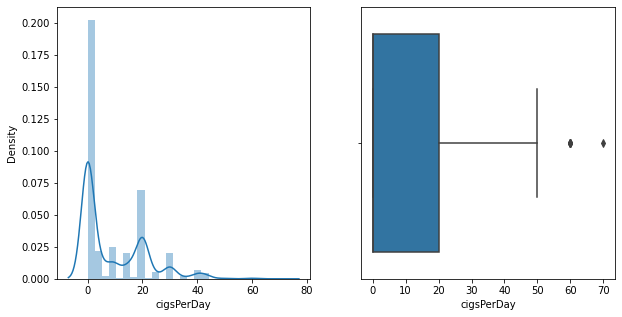

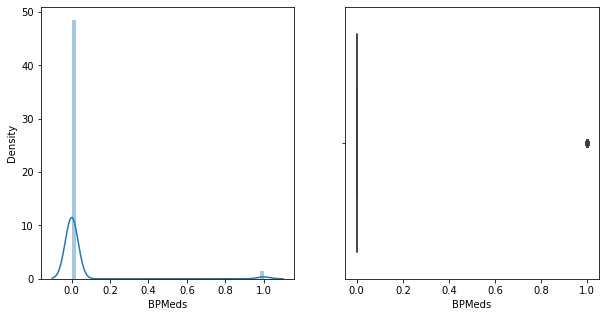

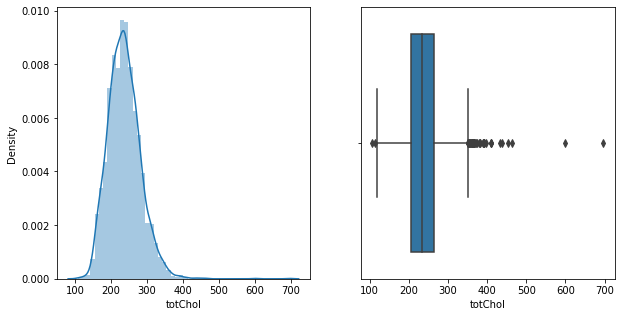

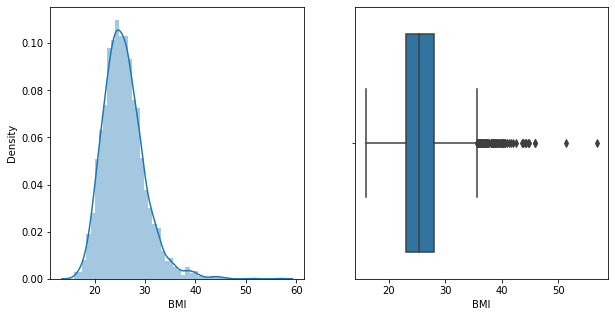

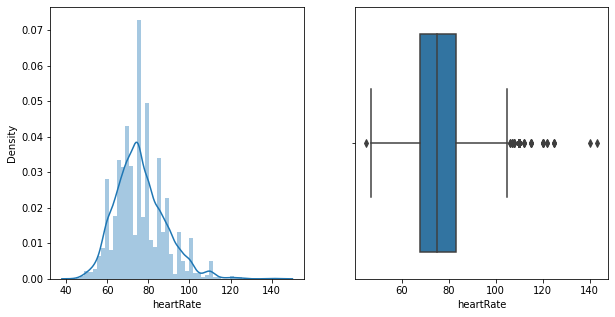

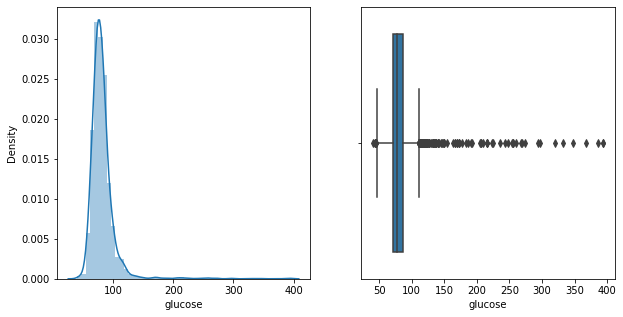

In [ ]:
for  i in ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']:
  fig, axes = plt.subplots(1,2,figsize=(10,5))
  sns.distplot(cvrp_df[i], ax=axes[0])
  sns.boxplot(cvrp_df[i], ax=axes[1])

In [ ]:
for  i in ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']:
  print(cvrp_df[i].value_counts())

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
13.0       3
12.0       3
19.0       2
45.0       2
16.0       2
14.0       1
38.0       1
70.0       1
Name: cigsPerDay, dtype: int64
0.0    3246
1.0     100
Name: BPMeds, dtype: int64
240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
119.0     1
353.0     1
398.0     1
364.0     1
367.0     1
Name: totChol, Length: 240, dtype: int64
22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
18.38     1
22.94     1
28.39     1
34.04     1
30.78     1
Name: BMI, Length: 1259, dtype: int64
75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
51.

In [ ]:
cvrp_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
for  i in ['education', 'totChol', 'BMI', 'heartRate', 'glucose']:
  cvrp_df[i] = cvrp_df[i].fillna(cvrp_df[i].median())

In [ ]:
cvrp_df['cigsPerDay'] = cvrp_df['cigsPerDay'].fillna(10)
cvrp_df['BPMeds'] = cvrp_df['BPMeds'].fillna(0)

In [ ]:
cvrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
cvrp_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**Lets look at the numerical variables Age, Height, weight and BMI**

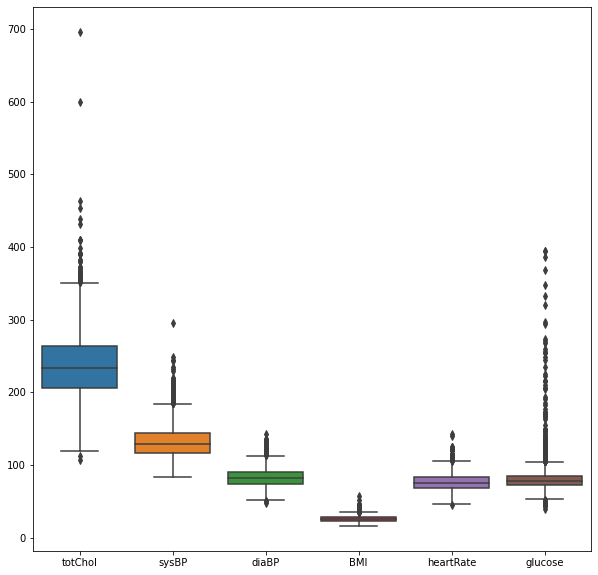

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=cvrp_df[['totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

**Lets look st the distribution of our target variables**

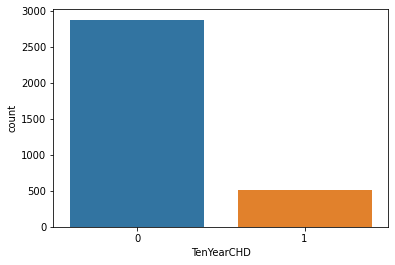

In [ ]:
sns.countplot(x='TenYearCHD',data=cvrp_df)

In [ ]:
cvrp_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
cvrp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## **Getting dummies for Categorical Values:**  

In [ ]:
cvrp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# cvrp_df = cvrp_df.replace({"sex":{"F":0,"M":1}, 'is_smoking':{'YES':1,'NO':0}})

In [ ]:
cvrp_df = pd.get_dummies(data=cvrp_df, columns=['sex', 'is_smoking'])
cvrp_df

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,1,0,0,1
1,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1,0,1,0
3386,3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,1,0,1,0
3387,3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,0,1,0,1
3388,3388,60,1.0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,0,1,1,0


In [ ]:
cvrp_df.head()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,1,0,0,1
1,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1


# **Models and its parameters:** 

**Now Lets implement 5 models on our dataset:**

1. **Logistic Regression**
2. **Support Vector Classifier**
3. **Decision Trees**
4. **Random forest**
5. **Gradient Boosting Machine**
6. **XGBoost** 


**We will be using three search algorithms for each :**

1. **GridSearchCV**
2. **RandomSearchCV**
3. **BayesianSearchCV** 

In [ ]:
lr = LogisticRegression()
svc = svm.SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
xgb = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)

In [ ]:
param_dict_lr = {
    'C' : [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6,1e+7,1e+8,1e+9]
}

param_dict_svc = {'C': [0.1, 1, 10, 1000],  
              'gamma': [1, 0.1, 0.01, 0.0001], 
              'kernel': ['rbf','linear','poly']} 

param_dict_dt = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
  }

param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

param_dict_xgb = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

# **Applying SMOTE to train and test splits:**  

In [ ]:
X, y = cvrp_df.drop(['id','TenYearCHD'],axis=1), cvrp_df['TenYearCHD']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(cvrp_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.25,random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4318, 17)
(1440, 17)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression:** 

In [ ]:
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict_lr,
                       cv = 5, verbose=2, scoring='roc_auc')

lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] C=1e-09 .........................................................
[CV] .......................................... C=1e-09, total=   0.0s
[CV] C=1e-09 .........................................................
[CV] .......................................... C=1e-09, total=   0.0s
[CV] C=1e-09 .........................................................
[CV] .......................................... C=1e-09, total=   0.0s
[CV] C=1e-09 .........................................................
[CV] .......................................... C=1e-09, total=   0.0s
[CV] C=1e-09 .........................................................
[CV] .......................................... C=1e-09, total=   0.0s
[CV] C=1e-08 .........................................................
[CV] .......................................... C=1e-08, total=   0.0s
[CV] C=1e-08 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] .......................................... C=1e-07, total=   0.0s
[CV] C=1e-07 .........................................................
[CV] .......................................... C=1e-07, total=   0.0s
[CV] C=1e-07 .........................................................
[CV] .......................................... C=1e-07, total=   0.0s
[CV] C=1e-07 .........................................................
[CV] .......................................... C=1e-07, total=   0.0s
[CV] C=1e-07 .........................................................
[CV] .......................................... C=1e-07, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.1s
[CV] C=100 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                               0.01, 0.1, 1, 10, 100, 0.001, 10000.0, 100000.0,
                               1000000.0, 10000000.0, 100000000.0,
                               1000000000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

In [ ]:
print('Train ROC-AUC score : ', lr_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.675081056044465
Test ROC-AUC score :  0.6694444444444444


In [ ]:
lr_random = RandomizedSearchCV(estimator=lr,
                       param_distributions = param_dict_lr,
                       cv = 5, verbose=2, scoring='roc_auc')

lr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                              0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 0.001, 10000.0, 100000.0,
                                            

In [ ]:
print('Train ROC-AUC score : ', lr_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.675081056044465
Test ROC-AUC score :  0.6694444444444444


In [ ]:
lr_bayes = BayesSearchCV(estimator=lr,
                       search_spaces = {'C' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='roc_auc', n_iter=32)

lr_bayes.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=369174.8355565212 .............................................
[CV] .............................. C=369174.8355565212, total=   0.1s
[CV] C=369174.8355565212 .............................................
[CV] .............................. C=369174.8355565212, total=   0.1s
[CV] C=369174.8355565212 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=369174.8355565212, total=   0.1s
[CV] C=369174.8355565212 .............................................
[CV] .............................. C=369174.8355565212, total=   0.1s
[CV] C=369174.8355565212 .............................................
[CV] .............................. C=369174.8355565212, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.6157131538052264 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. C=0.6157131538052264, total=   0.1s
[CV] C=0.6157131538052264 ............................................
[CV] ............................. C=0.6157131538052264, total=   0.1s
[CV] C=0.6157131538052264 ............................................
[CV] ............................. C=0.6157131538052264, total=   0.1s
[CV] C=0.6157131538052264 ............................................
[CV] ............................. C=0.6157131538052264, total=   0.1s
[CV] C=0.6157131538052264 ............................................
[CV] ............................. C=0.6157131538052264, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=12.114918618202585 ............................................
[CV] ............................. C=12.114918618202585, total=   0.1s
[CV] C=12.114918618202585 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

[CV] ............................. C=12.114918618202585, total=   0.1s
[CV] C=12.114918618202585 ............................................
[CV] ............................. C=12.114918618202585, total=   0.1s
[CV] C=12.114918618202585 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. C=12.114918618202585, total=   0.1s
[CV] C=12.114918618202585 ............................................
[CV] ............................. C=12.114918618202585, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.04503779733399328 ...........................................
[CV] ............................ C=0.04503779733399328, total=   0.0s
[CV] C=0.04503779733399328 ...........................................
[CV] ............................ C=0.04503779733399328, total=   0.0s
[CV] C=0.04503779733399328 ...........................................
[CV] ............................ C=0.04503779733399328, total=   0.0s
[CV] C=0.04503779733399328 ...........................................
[CV] ............................ C=0.04503779733399328, total=   0.0s
[CV] C=0.04503779733399328 ...........................................
[CV] ............................ C=0.04503779733399328, total=   0.0s
Fitting 5 folds fo

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................ C=0.28872577385577414, total=   0.1s
[CV] C=0.28872577385577414 ...........................................
[CV] ............................ C=0.28872577385577414, total=   0.1s
[CV] C=0.28872577385577414 ...........................................
[CV] ............................ C=0.28872577385577414, total=   0.1s
[CV] C=0.28872577385577414 ...........................................
[CV] ............................ C=0.28872577385577414, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=29.23739079606166 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=29.23739079606166, total=   0.1s
[CV] C=29.23739079606166 .............................................
[CV] .............................. C=29.23739079606166, total=   0.1s
[CV] C=29.23739079606166 .............................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] .............................. C=29.23739079606166, total=   0.1s
[CV] C=29.23739079606166 .............................................
[CV] .............................. C=29.23739079606166, total=   0.1s
[CV] C=29.23739079606166 .............................................
[CV] .............................. C=29.23739079606166, total=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.12573398949511577 ...........................................
[CV] ............................ C=0.12573398949511577, total=   0.0s
[CV] C=0.12573398949511577 ...........................................
[CV] ............................ C=0.12573398949511577, total=   0.0s
[CV] C=0.12573398949511577 ...........................................
[CV] ............................ C=0.12573398949511577, total=   0.0s
[CV] C=0.12573398949511577 ...........................................
[CV] ............................ C=0.12573398949511577, total=   0.0s
[CV] C=0.12573398949511577 ...........................................
[CV] ............................ C=0.12573398949511577, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=2.6874442817367568 ............................................
[CV] ............................. C=2.6874442817367568, total=   0.1s
[CV] C=2.6874442817367568 ...

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. C=2.6874442817367568, total=   0.1s
[CV] C=2.6874442817367568 ............................................
[CV] ............................. C=2.6874442817367568, total=   0.1s
[CV] C=2.6874442817367568 ............................................
[CV] ............................. C=2.6874442817367568, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.001448563989680759 ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=0.001448563989680759, total=   0.0s
[CV] C=0.001448563989680759 ..........................................
[CV] ........................... C=0.001448563989680759, total=   0.2s
[CV] C=0.001448563989680759 ..........................................
[CV] ........................... C=0.001448563989680759, total=   0.0s
[CV] C=0.001448563989680759 ..........................................
[CV] ........................... C=0.001448563989680759, total=   0.0s
[CV] C=0.001448563989680759 ..........................................
[CV] ........................... C=0.001448563989680759, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1.8840807409386677e-05 ........................................
[CV] ......................... C=1.8840807409386677e-05, total=   0.0s
[CV] C=1.8840807409386677e-05 ........................................
[CV] ......................... C=1.8840807409386677e-05, total=   0.0s
[CV] C=1.8840807409386677e-05 ........................................
[CV] ......................... C=1.8840807409386677e-05, total=   0.0s
[CV] C=1.8840807409386677e-05 ........................................
[CV] ......................... C=1.8840807409386677e-05, total=   0.0s
[CV] C=1.8840807409386677e-05 ........................................
[CV] ......................... C=1.8840807409386677e-05, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=6838.648406547266 .............................................
[CV] .............................. C=6838.648406547266, total=   0.1s
[CV] C=6838.648406547266 .............................................
[CV] .............................. C=6838.648406547266, total=   0.1s
[CV] C=6838.648406547266 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=6838.648406547266, total=   0.1s
[CV] C=6838.648406547266 .............................................
[CV] .............................. C=6838.648406547266, total=   0.1s
[CV] C=6838.648406547266 .............................................
[CV] .............................. C=6838.648406547266, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=590.2894124110335 .............................................
[CV] .............................. C=590.2894124110335, total=   0.1s
[CV] C=590.2894124110335 .............................................
[CV] .............................. C=590.2894124110335, total=   0.1s
[CV] C=590.2894124110335 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=590.2894124110335, total=   0.1s
[CV] C=590.2894124110335 .............................................
[CV] .............................. C=590.2894124110335, total=   0.1s
[CV] C=590.2894124110335 .............................................
[CV] .............................. C=590.2894124110335, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=44654.91744849634 .............................................
[CV] .............................. C=44654.91744849634, total=   0.1s
[CV] C=44654.91744849634 .............................................
[CV] .............................. C=44654.91744849634, total=   0.1s
[CV] C=44654.91744849634 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=44654.91744849634, total=   0.1s
[CV] C=44654.91744849634 .............................................
[CV] .............................. C=44654.91744849634, total=   0.1s
[CV] C=44654.91744849634 .............................................
[CV] .............................. C=44654.91744849634, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=2.577015224275266 .............................................
[CV] .............................. C=2.577015224275266, total=   0.1s
[CV] C=2.577015224275266 .............................................
[CV] .............................. C=2.577015224275266, total=   0.1s
[CV] C=2.577015224275266 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=2.577015224275266, total=   0.1s
[CV] C=2.577015224275266 .............................................
[CV] .............................. C=2.577015224275266, total=   0.1s
[CV] C=2.577015224275266 .............................................
[CV] .............................. C=2.577015224275266, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=46128.10874707631 .............................................
[CV] .............................. C=46128.10874707631, total=   0.1s
[CV] C=46128.10874707631 .............................................
[CV] .............................. C=46128.10874707631, total=   0.1s
[CV] C=46128.10874707631 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=46128.10874707631, total=   0.1s
[CV] C=46128.10874707631 .............................................
[CV] .............................. C=46128.10874707631, total=   0.1s
[CV] C=46128.10874707631 .............................................
[CV] .............................. C=46128.10874707631, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=410.4272662530499 .............................................
[CV] .............................. C=410.4272662530499, total=   0.1s
[CV] C=410.4272662530499 .............................................
[CV] .............................. C=410.4272662530499, total=   0.1s
[CV] C=410.4272662530499 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=410.4272662530499, total=   0.1s
[CV] C=410.4272662530499 .............................................
[CV] .............................. C=410.4272662530499, total=   0.1s
[CV] C=410.4272662530499 .............................................
[CV] .............................. C=410.4272662530499, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=993614.553538419 ..............................................
[CV] ............................... C=993614.553538419, total=   0.1s
[CV] C=993614.553538419 ..............................................
[CV] ............................... C=993614.553538419, total=   0.1s
[CV] C=993614.553538419 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... C=993614.553538419, total=   0.1s
[CV] C=993614.553538419 ..............................................
[CV] ............................... C=993614.553538419, total=   0.1s
[CV] C=993614.553538419 ..............................................
[CV] ............................... C=993614.553538419, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=2.6681629323335714 ............................................
[CV] ............................. C=2.6681629323335714, total=   0.1s
[CV] C=2.6681629323335714 ............................................
[CV] ............................. C=2.6681629323335714, total=   0.1s
[CV] C=2.6681629323335714 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

[CV] ............................. C=2.6681629323335714, total=   0.1s
[CV] C=2.6681629323335714 ............................................
[CV] ............................. C=2.6681629323335714, total=   0.1s
[CV] C=2.6681629323335714 ............................................
[CV] ............................. C=2.6681629323335714, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=3385.0929463657794 ............................................
[CV] ............................. C=3385.0929463657794, total=   0.1s
[CV] C=3385.0929463657794 ............................................
[CV] ............................. C=3385.0929463657794, total=   0.1s
[CV] C=3385.0929463657794 ............................................
[CV] ............................. C=3385.0929463657794, total=   0.1s
[CV] C=3385.0929463657794 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. C=3385.0929463657794, total=   0.1s
[CV] C=3385.0929463657794 ............................................
[CV] ............................. C=3385.0929463657794, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=2.552422097779304 .............................................
[CV] .............................. C=2.552422097779304, total=   0.1s
[CV] C=2.552422097779304 .............................................
[CV] .............................. C=2.552422097779304, total=   0.1s
[CV] C=2.552422097779304 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=2.552422097779304, total=   0.1s
[CV] C=2.552422097779304 .............................................
[CV] .............................. C=2.552422097779304, total=   0.1s
[CV] C=2.552422097779304 .............................................
[CV] .............................. C=2.552422097779304, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1.0000005770621017e-06 ........................................
[CV] ......................... C=1.0000005770621017e-06, total=   0.0s
[CV] C=1.0000005770621017e-06 ........................................
[CV] ......................... C=1.0000005770621017e-06, total=   0.0s
[CV] C=1.0000005770621017e-06 ........................................
[CV] ......................... C=1.0000005770621017e-06, total=   0.0s
[CV] C=1.0000005770621017e-06 ........................................
[CV] ......................... C=1.0000005770621017e-06, total=   0.0s
[CV] C=1.0000005770621017e-06 ........................................
[CV] ......................... C=1.0000005770621017e-06, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=99.76932459299348 .............................................
[CV] .............................. C=99.76932459299348, total=   0.1s
[CV] C=99.76932459299348 .............................................
[CV] .............................. C=99.76932459299348, total=   0.1s
[CV] C=99.76932459299348 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=99.76932459299348, total=   0.1s
[CV] C=99.76932459299348 .............................................
[CV] .............................. C=99.76932459299348, total=   0.1s
[CV] C=99.76932459299348 .............................................
[CV] .............................. C=99.76932459299348, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=68658.27747459889 .............................................
[CV] .............................. C=68658.27747459889, total=   0.1s
[CV] C=68658.27747459889 .............................................
[CV] .............................. C=68658.27747459889, total=   0.1s
[CV] C=68658.27747459889 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=68658.27747459889, total=   0.1s
[CV] C=68658.27747459889 .............................................
[CV] .............................. C=68658.27747459889, total=   0.1s
[CV] C=68658.27747459889 .............................................
[CV] .............................. C=68658.27747459889, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=999711.0806648852 .............................................
[CV] .............................. C=999711.0806648852, total=   0.1s
[CV] C=999711.0806648852 .............................................
[CV] .............................. C=999711.0806648852, total=   0.1s
[CV] C=999711.0806648852 .............................................
[CV] .............................. C=999711.0806648852, total=   0.1s
[CV] C=999711.0806648852 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=999711.0806648852, total=   0.1s
[CV] C=999711.0806648852 .............................................
[CV] .............................. C=999711.0806648852, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=3.461502106002889 .............................................
[CV] .............................. C=3.461502106002889, total=   0.1s
[CV] C=3.461502106002889 .............................................
[CV] .............................. C=3.461502106002889, total=   0.1s
[CV] C=3.461502106002889 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=3.461502106002889, total=   0.1s
[CV] C=3.461502106002889 .............................................
[CV] .............................. C=3.461502106002889, total=   0.1s
[CV] C=3.461502106002889 .............................................
[CV] .............................. C=3.461502106002889, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=2381.3756139665943 ............................................
[CV] ............................. C=2381.3756139665943, total=   0.1s
[CV] C=2381.3756139665943 ............................................
[CV] ............................. C=2381.3756139665943, total=   0.1s
[CV] C=2381.3756139665943 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. C=2381.3756139665943, total=   0.1s
[CV] C=2381.3756139665943 ............................................
[CV] ............................. C=2381.3756139665943, total=   0.1s
[CV] C=2381.3756139665943 ............................................
[CV] ............................. C=2381.3756139665943, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=74870.56078833784 .............................................
[CV] .............................. C=74870.56078833784, total=   0.1s
[CV] C=74870.56078833784 .............................................
[CV] .............................. C=74870.56078833784, total=   0.1s
[CV] C=74870.56078833784 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=74870.56078833784, total=   0.1s
[CV] C=74870.56078833784 .............................................
[CV] .............................. C=74870.56078833784, total=   0.1s
[CV] C=74870.56078833784 .............................................
[CV] .............................. C=74870.56078833784, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=85.06636544297248 .............................................
[CV] .............................. C=85.06636544297248, total=   0.1s
[CV] C=85.06636544297248 .............................................
[CV] .............................. C=85.06636544297248, total=   0.1s
[CV] C=85.06636544297248 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. C=85.06636544297248, total=   0.1s
[CV] C=85.06636544297248 .............................................
[CV] .............................. C=85.06636544297248, total=   0.1s
[CV] C=85.06636544297248 .............................................
[CV] .............................. C=85.06636544297248, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=2.6860404552519612 ............................................
[CV] ............................. C=2.6860404552519612, total=   0.1s
[CV] C=2.6860404552519612 ............................................
[CV] ............................. C=2.6860404552519612, total=   0.1s
[CV] C=2.6860404552519612 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. C=2.6860404552519612, total=   0.1s
[CV] C=2.6860404552519612 ............................................
[CV] ............................. C=2.6860404552519612, total=   0.1s
[CV] C=2.6860404552519612 ............................................
[CV] ............................. C=2.6860404552519612, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................................... C=1000000.0, total=   0.1s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                           fit_intercept=True,
                                           intercept_scaling=1, l1_ratio=None,
                                           max_iter=100, multi_class='auto',
                                           n_jobs=None, penalty='l2',
                                           random_state=None, solver='lbfgs',
                                           tol=0.0001, verbose=0,
                                           warm_start=False),
              fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False, scoring='roc_auc',
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='identity')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

LogisticRegression(C=2.6681629323335714, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Train ROC-AUC score : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.6743862899490505
Test ROC-AUC score :  0.6743055555555556


**For Logistic Regression, the best estimator so far is given by BayesSearchCV.** 

In [ ]:
lr_model = lr_random.best_estimator_
lr_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Support Vector Classifier:** 

In [ ]:
svc_grid = GridSearchCV(estimator=svc,
                       param_grid = param_dict_svc,
                       cv = 5, verbose=2, scoring='roc_auc')

svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 14.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [ ]:
print('Train ROC-AUC score : ', svc_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', svc_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9418712366836498
Test ROC-AUC score :  0.8416666666666667


In [ ]:
svc_random = RandomizedSearchCV(estimator=svc,
                       param_distributions = param_dict_svc,
                       cv = 5, verbose=2, scoring='roc_auc')

svc_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=poly, gamma=0.0001, C=0.1 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. kernel=poly, gamma=0.0001, C=0.1, total=   0.5s
[CV] kernel=poly, gamma=0.0001, C=0.1 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................. kernel=poly, gamma=0.0001, C=0.1, total=   0.5s
[CV] kernel=poly, gamma=0.0001, C=0.1 ................................
[CV] ................. kernel=poly, gamma=0.0001, C=0.1, total=   0.5s
[CV] kernel=poly, gamma=0.0001, C=0.1 ................................
[CV] ................. kernel=poly, gamma=0.0001, C=0.1, total=   0.5s
[CV] kernel=poly, gamma=0.0001, C=0.1 ................................
[CV] ................. kernel=poly, gamma=0.0001, C=0.1, total=   0.5s
[CV] kernel=linear, gamma=0.0001, C=0.1 ..............................
[CV] ............... kernel=linear, gamma=0.0001, C=0.1, total=   0.4s
[CV] kernel=linear, gamma=0.0001, C=0.1 ..............................
[CV] ............... kernel=linear, gamma=0.0001, C=0.1, total=   0.4s
[CV] kernel=linear, gamma=0.0001, C=0.1 ..............................
[CV] ............... kernel=linear, gamma=0.0001, C=0.1, total=   0.4s
[CV] kernel=linear, gamma=0.0001, C=0.1 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.0001],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=2)

In [ ]:
print('Train ROC-AUC score : ', svc_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', svc_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8485409911996294
Test ROC-AUC score :  0.8263888888888888


In [ ]:
svc_bayes = BayesSearchCV(estimator=svc, search_spaces = param_dict_svc,cv = 5, verbose=2, scoring='roc_auc', n_iter=32)

svc_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.4s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                            class_weight=None, coef0=0.0,
                            decision_function_shape='ovr', degree=3,
                            gamma='scale', kernel='rbf', max_iter=-1,
                            probability=False, random_state=None,
                            shrinking=True, tol=0.001, verbose=False),
              fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False, scoring='roc_auc',
              search_spaces={'C': [1000], 'gamma': [1], 'kernel': ['rbf']},
              verbose=2)

In [ ]:
svc_bayes.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print('Train ROC-AUC score : ', svc_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', svc_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9418712366836498
Test ROC-AUC score :  0.8416666666666667


**For Support Vector Classfier, the best estimator so far is given by BayesSearchCV.** 

In [ ]:
svc_model = svc_bayes.best_estimator_
svc_model

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# **Decision Tree Classifier:**  

In [ ]:
dt_grid = GridSearchCV(estimator=dt,
                       param_grid = param_dict_dt,
                       cv = 5, verbose=2, scoring='roc_auc')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100 .........
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, total=   0.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150 .........
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, total=   0.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50 ..........
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, total=   0.0s
[CV] max_depth=4, min_samples_leaf=50, m

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],

In [ ]:
dt_grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50}

In [ ]:
print('Train ROC-AUC score : ', dt_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', dt_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8082445576655859
Test ROC-AUC score :  0.7743055555555556


In [ ]:
dt_random = RandomizedSearchCV(estimator=dt,
                       param_distributions = param_dict_dt,
                       cv = 5, verbose=2, scoring='roc_auc')

dt_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=150, min_samples_leaf=40, max_depth=6 .........
[CV]  min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   0.0s
[CV] min_samples_split=150, min_samples_leaf=40, max_depth=6 .........
[CV]  min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   0.0s
[CV] min_samples_split=150, min_samples_leaf=40, max_depth=6 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   0.0s
[CV] min_samples_split=150, min_samples_leaf=40, max_depth=6 .........
[CV]  min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   0.0s
[CV] min_samples_split=150, min_samples_leaf=40, max_depth=6 .........
[CV]  min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=50, max_depth=6 ..........
[CV]  min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=50, max_depth=6 ..........
[CV]  min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=50, max_depth=6 ..........
[CV]  min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=50, max_depth=6 ..........
[CV]  min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.0s
[CV] min_samples_split=50, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dt_random.best_params_

{'max_depth': 8, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [ ]:
print('Train ROC-AUC score : ', dt_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', dt_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8050023158869847
Test ROC-AUC score :  0.7659722222222223


In [ ]:
dt_bayes = BayesSearchCV(estimator=dt,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                        },
                       cv = 5, verbose=2, scoring='roc_auc')

dt_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=28, min_samples_split=126 .........
[CV]  max_depth=7, min_samples_leaf=28, min_samples_split=126, total=   0.0s
[CV] max_depth=7, min_samples_leaf=28, min_samples_split=126 .........
[CV]  max_depth=7, min_samples_leaf=28, min_samples_split=126, total=   0.0s
[CV] max_depth=7, min_samples_leaf=28, min_samples_split=126 .........
[CV]  max_depth=7, min_samples_leaf=28, min_samples_split=126, total=   0.0s
[CV] max_depth=7, min_samples_leaf=28, min_samples_split=126 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=28, min_samples_split=126, total=   0.0s
[CV] max_depth=7, min_samples_leaf=28, min_samples_split=126 .........
[CV]  max_depth=7, min_samples_leaf=28, min_samples_split=126, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=53, min_samples_split=54 ..........
[CV]  max_depth=7, min_samples_leaf=53, min_samples_split=54, total=   0.0s
[CV] max_depth=7, min_samples_leaf=53, min_samples_split=54 ..........
[CV]  max_depth=7, min_samples_leaf=53, min_samples_split=54, total=   0.0s
[CV] max_depth=7, min_samples_leaf=53, min_samples_split=54 ..........
[CV]  max_depth=7, min_samples_leaf=53, min_samples_split=54, total=   0.0s
[CV] max_depth=7, min_samples_leaf=53, min_samples_split=54 ..........
[CV]  max_depth=7, min_samples_leaf=53, min_samples_split=54, total=   0.0s
[CV] max_depth=7, min_samples_leaf=53, min_samples_split=54 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=53, min_samples_split=54, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=87 ..........
[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=87, total=   0.0s
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=87 ..........
[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=87, total=   0.0s
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=87 ..........
[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=87, total=   0.0s
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=87 ..........


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=87, total=   0.0s
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=87 ..........
[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=87, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=86 ..........
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=86, total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=86 ..........
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=86, total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=86 ..........
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=86, total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=86 ..........
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=86, total=   0.0s
[CV] max_depth=4, min_samples_leaf=45, min_samples_split=86 ..........
[CV]  max_depth=4, min_samples_leaf=45, min_samples_split=8

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=51, min_samples_split=129, total=   0.0s
[CV] max_depth=6, min_samples_leaf=51, min_samples_split=129 .........
[CV]  max_depth=6, min_samples_leaf=51, min_samples_split=129, total=   0.0s
[CV] max_depth=6, min_samples_leaf=51, min_samples_split=129 .........
[CV]  max_depth=6, min_samples_leaf=51, min_samples_split=129, total=   0.0s
[CV] max_depth=6, min_samples_leaf=51, min_samples_split=129 .........
[CV]  max_depth=6, min_samples_leaf=51, min_samples_split=129, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=61, min_samples_split=129 .........
[CV]  max_depth=5, min_samples_leaf=61, min_samples_split=129, total=   0.0s
[CV] max_depth=5, min_samples_leaf=61, min_samples_split=129 .........
[CV]  max_depth=5, min_samples_leaf=61, min_samples_split=129, total=   0.0s
[CV] max_depth=5, min_samples_leaf=61, min_samples_split=129 .........
[CV]  max_depth=5, min_samples_leaf=61, min_samples_split=129, total=   0.0s
[CV] max_depth=5, min_samples_leaf=61, min_samples_split=129 .........
[CV]  max_depth=5, min_samples_leaf=61, min_samples_split=129, total=   0.0s
[CV] max_depth=5, min_samples_leaf=61, min_samples_split=129 .........
[CV]  max_depth=5, min_samples_leaf=61, min_samples_split=129, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=59, min_samples_split=100 .........
[CV]  max_depth=5, min_samples_leaf=59, min_samples_split=100, total=  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=54, total=   0.0s
[CV] max_depth=7, min_samples_leaf=50, min_samples_split=54 ..........
[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=54, total=   0.0s
[CV] max_depth=7, min_samples_leaf=50, min_samples_split=54 ..........
[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=54, total=   0.0s
[CV] max_depth=7, min_samples_leaf=50, min_samples_split=54 ..........
[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=54, total=   0.0s
[CV] max_depth=7, min_samples_leaf=50, min_samples_split=54 ..........
[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=54, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=97, min_samples_split=125 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=97, min_samples_split=125, total=   0.0s
[CV] max_depth=6, min_samples_leaf=97, min_samples_split=125 .........
[CV]  max_depth=6, min_samples_leaf=97, min_samples_split=125, total=   0.0s
[CV] max_depth=6, min_samples_leaf=97, min_samples_split=125 .........
[CV]  max_depth=6, min_samples_leaf=97, min_samples_split=125, total=   0.0s
[CV] max_depth=6, min_samples_leaf=97, min_samples_split=125 .........
[CV]  max_depth=6, min_samples_leaf=97, min_samples_split=125, total=   0.0s
[CV] max_depth=6, min_samples_leaf=97, min_samples_split=125 .........
[CV]  max_depth=6, min_samples_leaf=97, min_samples_split=125, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=91, min_samples_split=110 .........
[CV]  max_depth=4, min_samples_leaf=91, min_samples_split=110, total=   0.0s
[CV] max_depth=4, min_samples_leaf=91, min_samples_split=110 .........
[CV]  max_depth=4, min_samples_leaf=91, min_samples_split=110, total=   0.0s
[CV] max_depth=4, min_samples_leaf=91, min_samples_split=110 .........
[CV]  max_depth=4, min_samples_leaf=91, min_samples_split=110, total=   0.0s
[CV] max_depth=4, min_samples_leaf=91, min_samples_split=110 .........
[CV]  max_depth=4, min_samples_leaf=91, min_samples_split=110, total=   0.0s
[CV] max_depth=4, min_samples_leaf=91, min_samples_split=110 .........
[CV]  max_depth=4, min_samples_leaf=91, min_samples_split=110, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=32, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=32, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=32, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=32, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=32, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=32, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=32, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=32, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=32, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=32, min_samples_split=150, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, total=   0.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, total=   0.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, total=   0.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, total=   0.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=58 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=58, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=58 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=58, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=58 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=58, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=58 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=58, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=58 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=58, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=146 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=146, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=146 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=146, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=146 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=146, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=146 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=146, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=146 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=146, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=148 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=148, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=135 .........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=135, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=135 .........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=135, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=135 .........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=135, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=135 .........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=135, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=135 .........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=135, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=149, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=149, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=149, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=149, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=149, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=143 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=143, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=143 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=143, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=143 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=143, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=143 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=143, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=143 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=143, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=62 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=62, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=62 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=62, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=62 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=62, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=62 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=62, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=62 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=62, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=150 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=150, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=150 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=150, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=150 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=150, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=150 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=150, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=150 .........
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=150, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=41, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=41, min_samples_split=150, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=53, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=53, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=53, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=53, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=53 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=53, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149 .........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150 .........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=50, total=   0.0s
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=50 ..........
[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=50, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=50 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=50, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features=None,
                                               max_leaf_nodes=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               presort='deprecated',
                                               random_state=None,
                                               splitter='best'),
              fi...
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
    

In [ ]:
dt_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 10),
             ('min_samples_split', 50)])

In [ ]:
print('Train ROC-AUC score : ', dt_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', dt_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8186660490968041
Test ROC-AUC score :  0.7875


**For Decision Tree classifier, the best estimator so far is given by GridSearchCV.** 

In [ ]:
dt_model = dt_grid.best_estimator_
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# **Random Forest Classifier:** 

In [ ]:
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [ ]:
print('Train ROC-AUC score : ', rf_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8341824918943955
Test ROC-AUC score :  0.8201388888888889


In [ ]:
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   0.4s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   0.4s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   0.4s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   0.4s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   0.4s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   0.2s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   0.2s
[CV] n_estimators=50, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [ ]:
print('Train ROC-AUC score : ', rf_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8436776285317277
Test ROC-AUC score :  0.8298611111111112


In [ ]:
rf_bayes = BayesSearchCV(estimator=rf,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='roc_auc')

rf_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21 
[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21, total=   0.1s
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21 
[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21, total=   0.1s
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21, total=   0.1s
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21 
[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21, total=   0.1s
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21 
[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=110, n_estimators=21, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26 
[CV]  max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26, total=   0.1s
[CV] max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26, total=   0.1s
[CV] max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26 
[CV]  max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26, total=   0.1s
[CV] max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26 
[CV]  max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26, total=   0.1s
[CV] max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26 
[CV]  max_depth=5, min_samples_leaf=23, min_samples_split=57, n_estimators=26, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82, total=   0.4s
[CV] max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82, total=   0.4s
[CV] max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82 
[CV]  max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82, total=   0.3s
[CV] max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82 
[CV]  max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82, total=   0.3s
[CV] max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82 
[CV]  max_depth=7, min_samples_leaf=17, min_samples_split=100, n_estimators=82, total=   0.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81, total=   0.3s
[CV] max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81, total=   0.3s
[CV] max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81 
[CV]  max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81, total=   0.3s
[CV] max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81 
[CV]  max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81, total=   0.3s
[CV] max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81 
[CV]  max_depth=5, min_samples_leaf=75, min_samples_split=149, n_estimators=81, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47 
[CV]  max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47, total=   0.2s
[CV] max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47, total=   0.2s
[CV] max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47 
[CV]  max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47, total=   0.2s
[CV] max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47 
[CV]  max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47, total=   0.2s
[CV] max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47 
[CV]  max_depth=5, min_samples_leaf=18, min_samples_split=116, n_estimators=47, total=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13, total=   0.1s
[CV] max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13 
[CV]  max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13, total=   0.1s
[CV] max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13 
[CV]  max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13, total=   0.1s
[CV] max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13 
[CV]  max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13, total=   0.1s
[CV] max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13 
[CV]  max_depth=7, min_samples_leaf=62, min_samples_split=147, n_estimators=13, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=12, min_samples_split=100, n_estimators=18 
[CV]  max_depth=4, min_samples_leaf=12, min_samples_split=100, n_estimators=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=12, min_samples_split=100, n_estimators=18, total=   0.1s
[CV] max_depth=4, min_samples_leaf=12, min_samples_split=100, n_estimators=18 
[CV]  max_depth=4, min_samples_leaf=12, min_samples_split=100, n_estimators=18, total=   0.1s
[CV] max_depth=4, min_samples_leaf=12, min_samples_split=100, n_estimators=18 
[CV]  max_depth=4, min_samples_leaf=12, min_samples_split=100, n_estimators=18, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67, total=   0.2s
[CV] max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67, total=   0.2s
[CV] max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67 
[CV]  max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67, total=   0.2s
[CV] max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67 
[CV]  max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67, total=   0.2s
[CV] max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67 
[CV]  max_depth=4, min_samples_leaf=21, min_samples_split=51, n_estimators=67, total=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56, total=   0.2s
[CV] max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56, total=   0.2s
[CV] max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56 
[CV]  max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56, total=   0.2s
[CV] max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56 
[CV]  max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56, total=   0.2s
[CV] max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56 
[CV]  max_depth=5, min_samples_leaf=53, min_samples_split=116, n_estimators=56, total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72, total=   0.3s
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72, total=   0.3s
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72 
[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72, total=   0.3s
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72 
[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72, total=   0.3s
[CV] max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72 
[CV]  max_depth=4, min_samples_leaf=41, min_samples_split=61, n_estimators=72, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=75, n_estimators=10, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98, total=   0.4s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98, total=   0.4s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98, total=   0.4s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98, total=   0.4s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=66, n_estimators=98, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=134, n_estimators=94, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97, total=   0.4s
[CV] max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97, total=   0.4s
[CV] max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97, total=   0.4s
[CV] max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97, total=   0.4s
[CV] max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=31, min_samples_split=57, n_estimators=97, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11, total=   0.1s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11, total=   0.1s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11, total=   0.0s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11, total=   0.1s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=59, n_estimators=11, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=51, n_estimators=86, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12 
[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12, total=   0.1s
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12 
[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12, total=   0.0s
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12 
[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12, total=   0.0s
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12, total=   0.0s
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12 
[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=52, n_estimators=12, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96, total=   0.4s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96, total=   0.4s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96, total=   0.4s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96, total=   0.4s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=57, n_estimators=96, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=92, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=39, min_samples_split=51, n_estimators=100, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12, total=   0.1s
[CV] max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12, total=   0.1s
[CV] max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12, total=   0.1s
[CV] max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12, total=   0.1s
[CV] max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=17, min_samples_split=50, n_estimators=12, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=53, n_estimators=10, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=149, n_estimators=90, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99, total=   0.5s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99, total=   0.4s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99 
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99, total=   0.4s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99 
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99, total=   0.4s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99 
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=51, n_estimators=99, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=147, n_estimators=14, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98, total=   0.4s
[CV] max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98, total=   0.3s
[CV] max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98 
[CV]  max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98, total=   0.3s
[CV] max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98 
[CV]  max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98, total=   0.3s
[CV] max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98 
[CV]  max_depth=4, min_samples_leaf=12, min_samples_split=148, n_estimators=98, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96, total=   0.4s
[CV] max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96, total=   0.4s
[CV] max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96 
[CV]  max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96, total=   0.4s
[CV] max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96 
[CV]  max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96, total=   0.4s
[CV] max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96 
[CV]  max_depth=7, min_samples_leaf=33, min_samples_split=51, n_estimators=96, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75, total=   0.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75, total=   0.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75, total=   0.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75, total=   0.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=75, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10 
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10, total=   0.1s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10 
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10 
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10, total=   0.0s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10, total=   0.1s
[CV] max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10 
[CV]  max_depth=7, min_samples_leaf=11, min_samples_split=60, n_estimators=10, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=146, n_estimators=95, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94, total=   0.4s
[CV] max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94, total=   0.4s
[CV] max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94 
[CV]  max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94, total=   0.4s
[CV] max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94 
[CV]  max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94, total=   0.4s
[CV] max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94 
[CV]  max_depth=8, min_samples_leaf=38, min_samples_split=146, n_estimators=94, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93, total=   0.3s
[CV] max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93, total=   0.3s
[CV] max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93 
[CV]  max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93, total=   0.3s
[CV] max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93 
[CV]  max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93, total=   0.3s
[CV] max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93 
[CV]  max_depth=4, min_samples_leaf=100, min_samples_split=140, n_estimators=93, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94, total=   0.4s
[CV] max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94 
[CV]  max_depth=7, min_samples_leaf=10, min_samples_split=54, n_estimators=94, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12, total=   0.1s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12, total=   0.1s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12, total=   0.1s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12, total=   0.1s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=57, n_estimators=12, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=...
              refit=True, return_train_score=False, scoring='roc_auc',
              search_spaces=

In [ ]:
rf_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 10),
             ('min_samples_split', 50),
             ('n_estimators', 100)])

In [ ]:
print('Train ROC-AUC score : ', rf_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8659101435849931
Test ROC-AUC score :  0.8368055555555556


**For Random forest classifier, the best estimator so far is given by RandomsearchCV.**

In [ ]:
rf_model = rf_bayes.best_estimator_
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# **Gradient Boosting Classifier:** 

In [ ]:
gb_grid = GridSearchCV(estimator=gbm,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.9s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.9s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [ ]:
print('Train ROC-AUC score : ', gb_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', gb_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9587772116720704
Test ROC-AUC score :  0.8993055555555556


In [ ]:
gb_random = RandomizedSearchCV(estimator=gbm,
                       param_distributions = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

gb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   1.3s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   1.3s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   1.3s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   1.3s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   1.3s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   0.8s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   0.8s
[CV] n_estimators=50, min_samples_split=50, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   57.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
gb_random.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 80}

In [ ]:
print('Train ROC-AUC score : ', gb_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', gb_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.944187123668365
Test ROC-AUC score :  0.8958333333333334


In [ ]:
gb_bayes = BayesSearchCV(estimator=gbm,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='roc_auc')

gb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39, total=   0.7s
[CV] max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39, total=   0.7s
[CV] max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39 
[CV]  max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39, total=   0.7s
[CV] max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39 
[CV]  max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39, total=   0.7s
[CV] max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39 
[CV]  max_depth=7, min_samples_leaf=57, min_samples_split=93, n_estimators=39, total=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50, total=   0.7s
[CV] max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50, total=   0.7s
[CV] max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50, total=   0.7s
[CV] max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50, total=   0.7s
[CV] max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=60, min_samples_split=143, n_estimators=50, total=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95, total=   1.3s
[CV] max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95, total=   1.3s
[CV] max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95 
[CV]  max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95, total=   1.3s
[CV] max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95 
[CV]  max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95, total=   1.3s
[CV] max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95 
[CV]  max_depth=5, min_samples_leaf=43, min_samples_split=126, n_estimators=95, total=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35, total=   0.7s
[CV] max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35, total=   0.7s
[CV] max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35 
[CV]  max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35, total=   0.7s
[CV] max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35 
[CV]  max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35, total=   0.7s
[CV] max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35 
[CV]  max_depth=8, min_samples_leaf=35, min_samples_split=55, n_estimators=35, total=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56, total=   0.8s
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56, total=   0.9s
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56 
[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56, total=   0.9s
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56 
[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56, total=   0.8s
[CV] max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56 
[CV]  max_depth=6, min_samples_leaf=77, min_samples_split=136, n_estimators=56, total=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48, total=   0.8s
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48, total=   0.8s
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48 
[CV]  max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48, total=   0.8s
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48 
[CV]  max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48, total=   0.8s
[CV] max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48 
[CV]  max_depth=6, min_samples_leaf=12, min_samples_split=91, n_estimators=48, total=   0.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83, total=   1.1s
[CV] max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83, total=   1.1s
[CV] max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83 
[CV]  max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83, total=   1.1s
[CV] max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83 
[CV]  max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83, total=   1.1s
[CV] max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83 
[CV]  max_depth=5, min_samples_leaf=86, min_samples_split=128, n_estimators=83, total=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43, total=   0.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43, total=   0.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43 
[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43, total=   0.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43 
[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43, total=   0.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43 
[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=76, n_estimators=43, total=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59, total=   0.9s
[CV] max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59, total=   0.9s
[CV] max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59 
[CV]  max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59, total=   0.9s
[CV] max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59 
[CV]  max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59, total=   0.9s
[CV] max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59 
[CV]  max_depth=6, min_samples_leaf=99, min_samples_split=73, n_estimators=59, total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87, total=   1.5s
[CV] max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87, total=   1.5s
[CV] max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87 
[CV]  max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87, total=   1.5s
[CV] max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87 
[CV]  max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87, total=   1.5s
[CV] max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87 
[CV]  max_depth=7, min_samples_leaf=71, min_samples_split=90, n_estimators=87, total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11 
[CV]  max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11, total=   0.2s
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11, total=   0.1s
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11 
[CV]  max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11, total=   0.1s
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11 
[CV]  max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11, total=   0.1s
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11 
[CV]  max_depth=4, min_samples_leaf=16, min_samples_split=52, n_estimators=11, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100, total=   1.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100, total=   1.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100, total=   1.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100, total=   1.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=100, total=   1.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67, total=   1.3s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67, total=   1.3s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67, total=   1.3s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67, total=   1.3s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=137, n_estimators=67, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=51, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   1.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   2.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   2.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   2.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   2.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   2.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50, total=   0.8s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50, total=   0.8s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50, total=   0.8s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50, total=   0.8s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=150, n_estimators=50, total=   0.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=88, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77, total=   1.7s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77, total=   1.6s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77, total=   1.6s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77, total=   1.6s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=54, n_estimators=77, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100, total=   1.9s
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100, total=   1.9s
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100, total=   1.9s
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100, total=   1.9s
[CV] max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=42, min_samples_split=150, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73, total=   1.3s
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73, total=   1.3s
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73 
[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73, total=   1.3s
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73 
[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73, total=   1.3s
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73 
[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=54, n_estimators=73, total=   1.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71, total=   0.9s
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71, total=   0.8s
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71 
[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71, total=   0.8s
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71 
[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71, total=   0.8s
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71 
[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=53, n_estimators=71, total=   0.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=52, n_estimators=89, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100, total=   1.8s
[CV] max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100, total=   1.8s
[CV] max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100, total=   1.8s
[CV] max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100, total=   1.7s
[CV] max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=92, min_samples_split=70, n_estimators=100, total=   1.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68, total=   1.4s
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68, total=   1.3s
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68 
[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68, total=   1.3s
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68 
[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68, total=   1.3s
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68 
[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=144, n_estimators=68, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=52, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42, total=   0.5s
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42, total=   0.5s
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42 
[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42, total=   0.5s
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42 
[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42, total=   0.5s
[CV] max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42 
[CV]  max_depth=4, min_samples_leaf=11, min_samples_split=52, n_estimators=42, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100, total=   1.1s
[CV] max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100, total=   1.1s
[CV] max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=94, min_samples_split=66, n_estimators=100, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87, total=   1.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=87, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87, total=   1.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87, total=   1.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87, total=   1.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87, total=   1.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=87, total=   1.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35, total=   0.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35, total=   0.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35, total=   0.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35, total=   0.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=145, n_estimators=35, total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=54, total=   1.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75, total=   1.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75, total=   1.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75, total=   1.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75, total=   1.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=55, n_estimators=75, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100, total=   2.1s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100, total=   2.1s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100, total=   2.1s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100, total=   2.1s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=75, n_estimators=100, total=   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100, total=   1.8s
[CV] max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100, total=   1.7s
[CV] max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100, total=   1.8s
[CV] max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100, total=   1.8s
[CV] max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=85, min_samples_split=53, n_estimators=100, total=   1.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67, total=   1.4s
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67, total=   1.3s
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67 
[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67, total=   1.3s
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67 
[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67, total=   1.3s
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67 
[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=147, n_estimators=67, total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=53, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41, total=   0.8s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41, total=   0.8s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41, total=   0.8s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41, total=   0.8s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=41, total=   0.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91, total=   1.1s
[CV] max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91, total=   1.1s
[CV] max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91 
[CV]  max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91, total=   1.1s
[CV] max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91 
[CV]  max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91, total=   1.0s
[CV] max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91 
[CV]  max_depth=4, min_samples_leaf=14, min_samples_split=148, n_estimators=91, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91, total=   1.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91, total=   1.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91, total=   1.5s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91, total=   1.5s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=91, total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100, total=   1.2s
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=140, n_estimators=100, total=   1.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52, total=   1.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52, total=   1.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52, total=   1.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52, total=   1.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=52, total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63, total=   1.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63, total=   1.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63, total=   1.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63, total=   1.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=63, total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=89, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31, total=   0.6s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31, total=   0.6s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31, total=   0.6s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31, total=   0.6s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=31, total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43, total=   0.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43, total=   0.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43, total=   0.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43, total=   0.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=53, n_estimators=43, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                   criterion='friedman_mse',
                                                   init=None, learning_rate=0.1,
                                                   loss='deviance', max_depth=3,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_iter...
    

In [ ]:
gb_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 11),
             ('min_samples_split', 52),
             ('n_estimators', 89)])

In [ ]:
print('Train ROC-AUC score : ', gb_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', gb_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9759147753589624
Test ROC-AUC score :  0.9006944444444445


**For Gradient boosting classifier, the best estimator so far is given by GridSearchCV.**

In [ ]:
gb_model = gb_grid.best_estimator_
gb_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# **XG Boost Classifier:** 

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb,
                       param_grid = param_dict_xgb,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV] .

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:  7.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},


In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 140}

In [ ]:
print('Train ROC-AUC score : ', xgb_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.999073645206114
Test ROC-AUC score :  0.9083333333333333


In [ ]:
xgb_random = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict_xgb,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=60, max_depth=9, learning_rate=0.005 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=60, max_depth=9, learning_rate=0.005, total=   0.6s
[CV] n_estimators=60, max_depth=9, learning_rate=0.005 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=60, max_depth=9, learning_rate=0.005, total=   0.6s
[CV] n_estimators=60, max_depth=9, learning_rate=0.005 ...............
[CV]  n_estimators=60, max_depth=9, learning_rate=0.005, total=   0.6s
[CV] n_estimators=60, max_depth=9, learning_rate=0.005 ...............
[CV]  n_estimators=60, max_depth=9, learning_rate=0.005, total=   0.6s
[CV] n_estimators=60, max_depth=9, learning_rate=0.005 ...............
[CV]  n_estimators=60, max_depth=9, learning_rate=0.005, total=   0.6s
[CV] n_estimators=140, max_depth=7, learning_rate=0.005 ..............
[CV]  n_estimators=140, max_depth=7, learning_rate=0.005, total=   1.0s
[CV] n_estimators=140, max_depth=7, learning_rate=0.005 ..............
[CV]  n_estimators=140, max_depth=7, learning_rate=0.005, total=   1.1s
[CV] n_estimators=140, max_depth=7, learning_rate=0.005 ..............
[CV]  n_estimators=140, max_depth=7, learning_rate=0.005, total=   1.1s
[CV] n_estimators=140, max_depth=7, learning_rate=0.005 ..............
[CV

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=4,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=42, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depreca

In [ ]:
xgb_random.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 180}

In [ ]:
print('Train ROC-AUC score : ', xgb_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9124594719777674
Test ROC-AUC score :  0.8805555555555555


In [ ]:
xgb_bayes = BayesSearchCV(estimator=xgb,
                       search_spaces = {
                          'max_depth': Integer(2, 10),
                          'n_estimators': Integer(60, 220),
                          'learning_rate': Real(0.001, 0.1, prior='log-uniform')
                        },
                       cv = 5, verbose=2, scoring='roc_auc', n_jobs=10)

xgb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    9.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    5.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    9.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    6.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    2.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    3.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    3.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    3.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    9.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    8.1s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   11.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    6.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    3.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    0.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    8.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   11.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    5.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    3.5s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    3.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   11.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   12.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    2.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    1.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    8.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    4.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.5s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    3.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    6.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    6.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   10.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    8.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    3.6s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=1, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=3, min_child_weight=1,
                                      missing=None, n_estimators=100, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_...
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False, scoring='roc_auc',
              search_spaces={'learning_rate': Real(low=0.001, high=0.1, prior='log-uniform', transform='identity'),
                             'max_depth'

In [ ]:
xgb_bayes.best_params_

OrderedDict([('learning_rate', 0.09776808328011032),
             ('max_depth', 10),
             ('n_estimators', 69)])

In [ ]:
print('Train ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.9925891616489115
Test ROC-AUC score :  0.9020833333333333


In [ ]:
 xgb_model = xgb_bayes.best_estimator_
 xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.09776808328011032, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=69, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

# **Lets collect all our best models!** 

In [ ]:
models = [lr_model, svc_model, dt_model, gb_model, rf_model, xgb_model]

In [ ]:
# def model_metric(models,X_train, X_test, y_train, y_test):
  
cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
        'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC']
model_df = pd.DataFrame(columns=cols)
conf_train, conf_test = {}, {}

i = 0
for model in models:

  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  model_df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(2)
  model_df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(2)
  model_df.loc[i,'Train precision'] = precision_score(y_train, y_pred_train).round(2)
  model_df.loc[i,'Test precision'] = precision_score( y_test, y_pred_test).round(2)
  model_df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(2)
  model_df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(2)
  model_df.loc[i,'Train f1 score'] = f1_score(y_train, y_pred_train).round(2)
  model_df.loc[i,'Test f1 score'] = f1_score(y_test, y_pred_test).round(2)
  model_df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(2)
  model_df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(2)

  conf_train[model.__class__.__name__] = confusion_matrix(y_train, y_pred_train)
  conf_test[model.__class__.__name__] = confusion_matrix(y_test, y_pred_test)

  i+=1

print(model_df, conf_train, conf_test)

  Train accuracy Test accuracy  ... Train ROC-AUC Test ROC-AUC
0           0.68          0.67  ...          0.67         0.67
1           0.94          0.84  ...          0.94         0.84
2           0.81          0.77  ...          0.81         0.77
3           0.96           0.9  ...          0.96         0.89
4           0.86          0.85  ...          0.86         0.85
5           0.99           0.9  ...          0.99          0.9

[6 rows x 10 columns] {'LogisticRegression': array([[1416,  727],
       [ 676, 1499]]), 'SVC': array([[2039,  104],
       [ 147, 2028]]), 'DecisionTreeClassifier': array([[1769,  374],
       [ 454, 1721]]), 'GradientBoostingClassifier': array([[2129,   14],
       [ 156, 2019]]), 'RandomForestClassifier': array([[1941,  202],
       [ 384, 1791]]), 'XGBClassifier': array([[2141,    2],
       [  30, 2145]])} {'LogisticRegression': array([[486, 250],
       [226, 478]]), 'SVC': array([[604, 132],
       [ 96, 608]]), 'DecisionTreeClassifier': array([

In [ ]:
model_df['Model Name'] = pd.Series(['LogisticRegression','SupportVectorClassifier','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','XGBClassifier'])

In [ ]:
model_df

,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC,Model Name
0,0.68,0.67,0.67,0.66,0.69,0.68,0.68,0.67,0.67,0.67,LogisticRegression
1,0.94,0.84,0.95,0.82,0.93,0.86,0.94,0.84,0.94,0.84,SupportVectorClassifier
2,0.81,0.77,0.82,0.78,0.79,0.75,0.81,0.76,0.81,0.77,DecisionTreeClassifier
3,0.96,0.9,0.99,0.93,0.93,0.85,0.96,0.89,0.96,0.89,GradientBoostingClassifier
4,0.86,0.85,0.9,0.88,0.82,0.8,0.86,0.84,0.86,0.85,RandomForestClassifier
5,0.99,0.9,1,0.92,0.99,0.88,0.99,0.9,0.99,0.9,XGBClassifier


It is quite evident from the results that XGBoost is the best model that can be used for the Cardiovascular Risk Prediciton dataset since all the performance metrics (accuracy, precision, recall and roc-auc score) show a higher value for the XGBoost model !

In [ ]:
for key, value in conf_train.items():
  print(f'Confusion matrix for {key} :\n{value}')

Confusion matrix for LogisticRegression :
[[1416  727]
 [ 676 1499]]
Confusion matrix for SVC :
[[2039  104]
 [ 147 2028]]
Confusion matrix for DecisionTreeClassifier :
[[1769  374]
 [ 454 1721]]
Confusion matrix for GradientBoostingClassifier :
[[2129   14]
 [ 156 2019]]
Confusion matrix for RandomForestClassifier :
[[1941  202]
 [ 384 1791]]
Confusion matrix for XGBClassifier :
[[2141    2]
 [  30 2145]]


In [ ]:
for key, value in conf_test.items():
  print(f'Confusion matrix for {key} :\n{value}')

Confusion matrix for LogisticRegression :
[[486 250]
 [226 478]]
Confusion matrix for SVC :
[[604 132]
 [ 96 608]]
Confusion matrix for DecisionTreeClassifier :
[[588 148]
 [177 527]]
Confusion matrix for GradientBoostingClassifier :
[[690  46]
 [105 599]]
Confusion matrix for RandomForestClassifier :
[[659  77]
 [141 563]]
Confusion matrix for XGBClassifier :
[[683  53]
 [ 88 616]]


In [ ]:
xgb_model.fit(X_train, y_train)
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2143
           1       1.00      0.99      0.99      2175

    accuracy                           0.99      4318
   macro avg       0.99      0.99      0.99      4318
weighted avg       0.99      0.99      0.99      4318



              precision    recall  f1-score   support

           0       0.89      0.93      0.91       736
           1       0.92      0.88      0.90       704

    accuracy                           0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440



##**Roc-Auc curve for grid train data.**


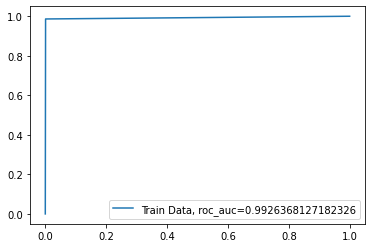

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_train)
auc = metrics.roc_auc_score(y_train, y_pred_train)
plt.plot(fpr,tpr,label="Train Data, roc_auc="+str(auc))
plt.legend(loc=4)
plt.show()

##**Roc-Auc curve for grid test data.**


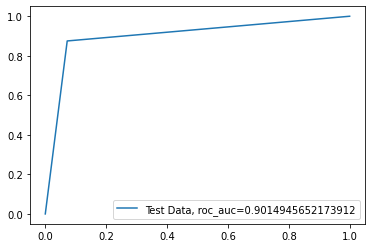

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_test)
auc = metrics.roc_auc_score(y_test, y_pred_test)
plt.plot(fpr,tpr,label="Test Data, roc_auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Feature Importances:**

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()

## **Random Forest Model:**

----

In [ ]:
explainer_train = shap.TreeExplainer(rf_model)
shap_values_train = explainer_train.shap_values(X_train)

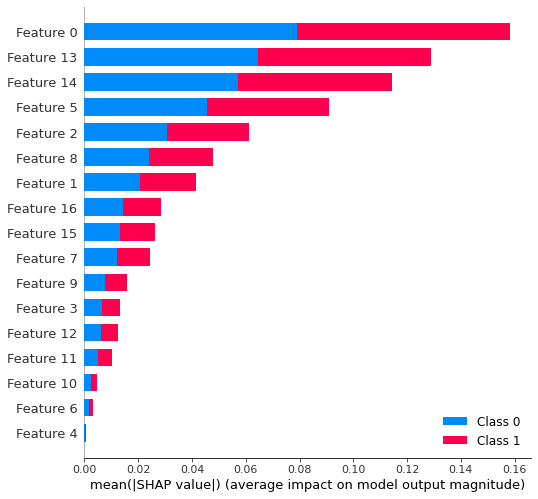

In [ ]:
shap.summary_plot(shap_values_train,X_train,plot_type='bar')

In [ ]:
explainer_test = shap.TreeExplainer(rf_model)
shap_values_test = explainer_test.shap_values(X_test)

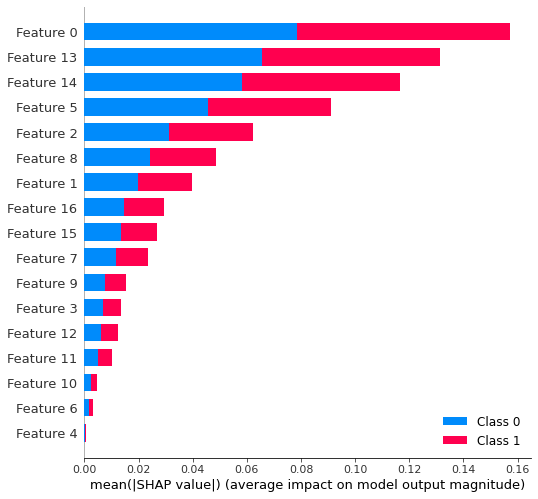

In [ ]:
shap.summary_plot(shap_values_test,X_test,plot_type='bar')

In [ ]:
cvrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
 15  sex_F            3390 non-null   uint8  
 16  sex_M            3390 non-null   uint8  
 17  is_smoking_NO 

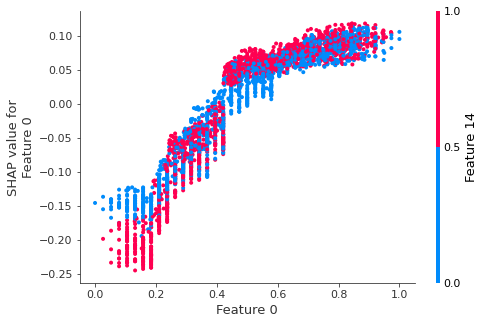

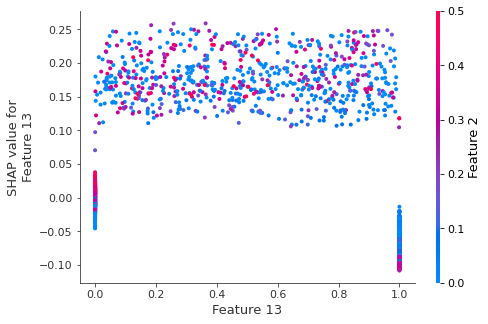

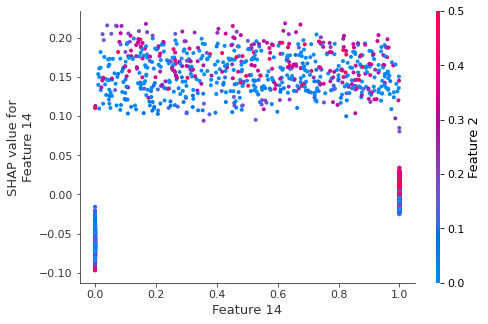

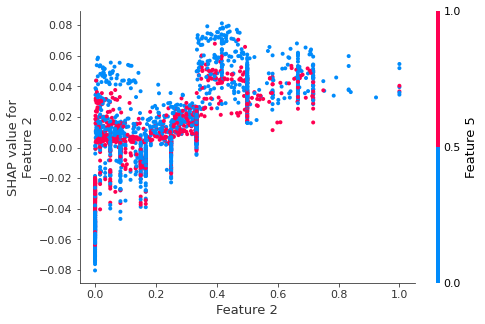

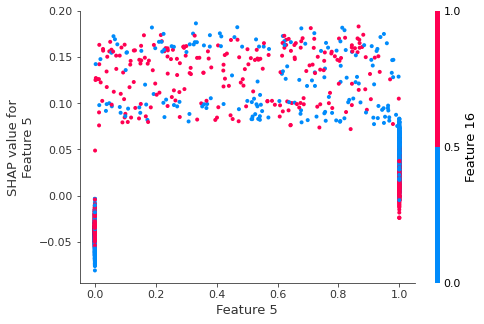

In [ ]:
Most_important_features = ['age', 'sex_F', 'sex_M', 'prevalentHyp','cigsPerDay']
top_vars = ['Feature 0', 'Feature 13', 'Feature 14', 'Feature 2','Feature 5']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train[1], X_train)

## **XGBoost Model:**

---

In [ ]:
explainer_train1 = shap.TreeExplainer(xgb_model)
shap_values_train = explainer_train1.shap_values(X_train)

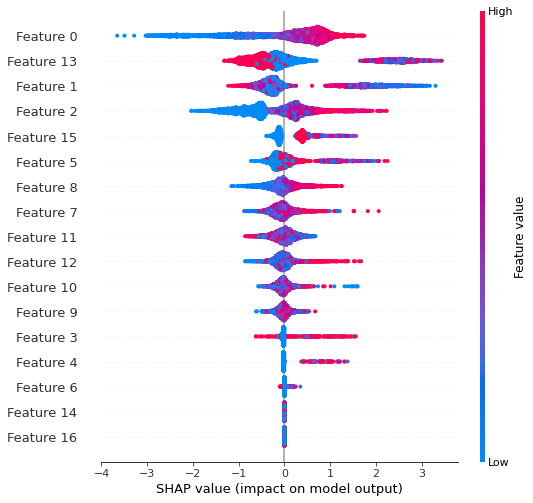

In [ ]:
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
explainer_test1 = shap.TreeExplainer(xgb_model)
shap_values_test = explainer_test1.shap_values(X_test)

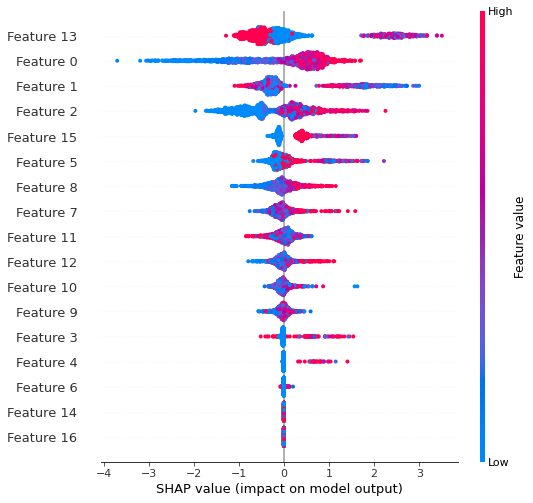

In [ ]:
shap.summary_plot(shap_values_test,X_test,plot_type='dot')

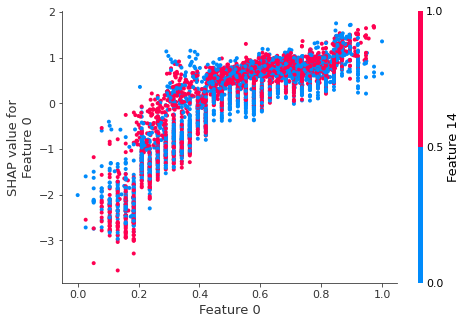

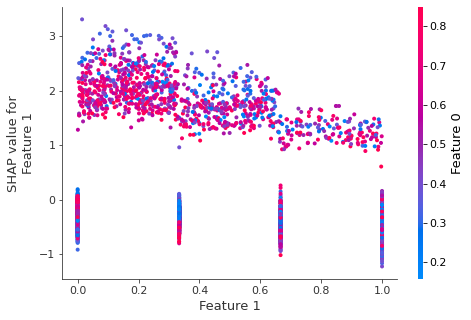

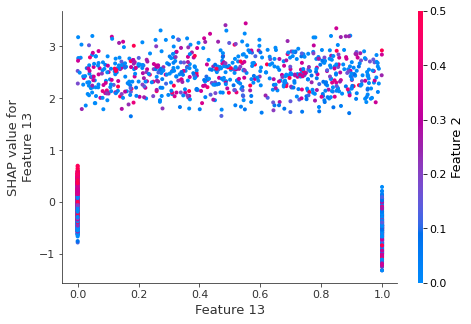

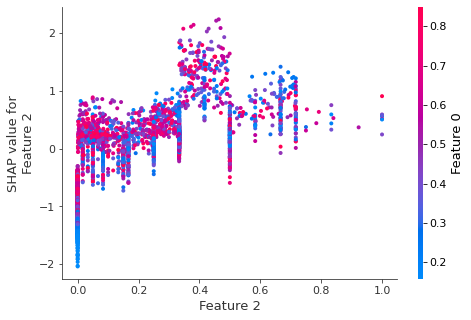

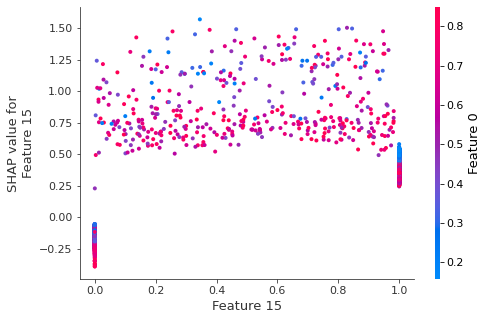

In [ ]:
top_vars = ['Feature 0', 'Feature 1', 'Feature 13', 'Feature 2','Feature 15']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train, X_train)

## **Gradient Boosting Machine:** 

---

In [ ]:
explainer_train2 = shap.TreeExplainer(gb_model)
shap_values_train = explainer_train2.shap_values(X_train)

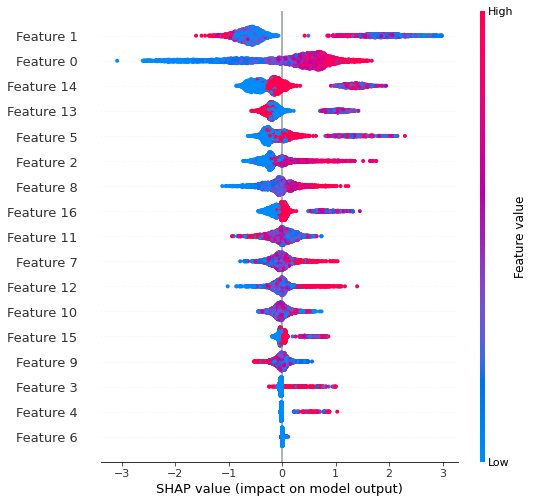

In [ ]:
shap.summary_plot(shap_values_train,X_train,plot_type='dot')

In [ ]:
explainer_test2 = shap.TreeExplainer(gb_model)
shap_values_test = explainer_test2.shap_values(X_test)

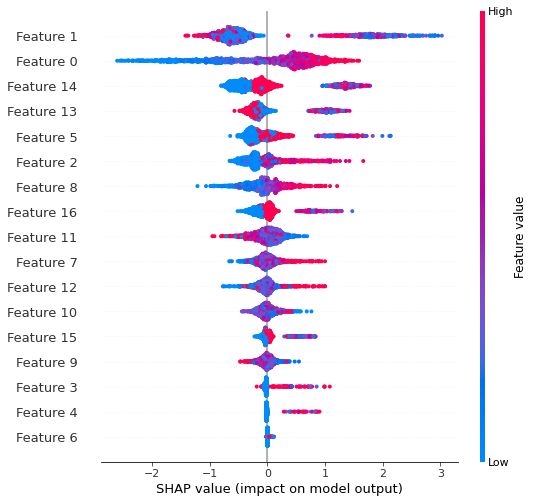

In [ ]:
shap.summary_plot(shap_values_test,X_test,plot_type='dot')

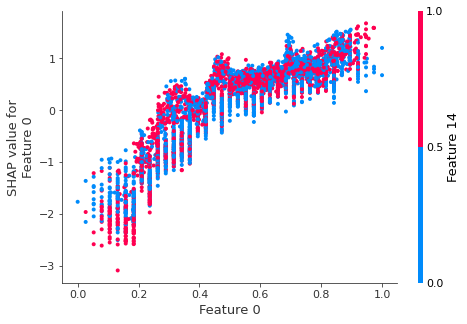

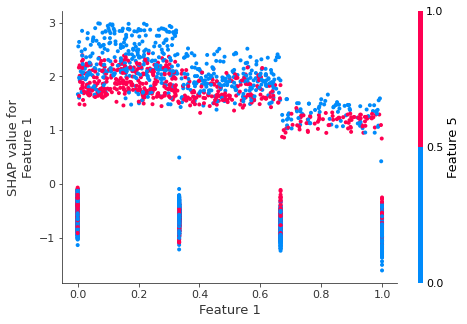

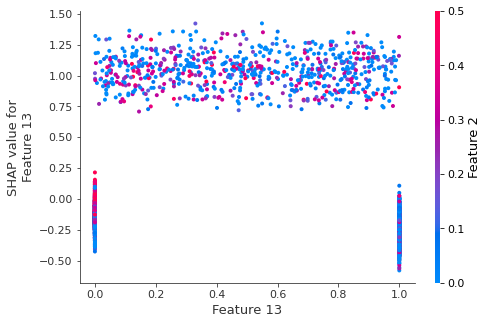

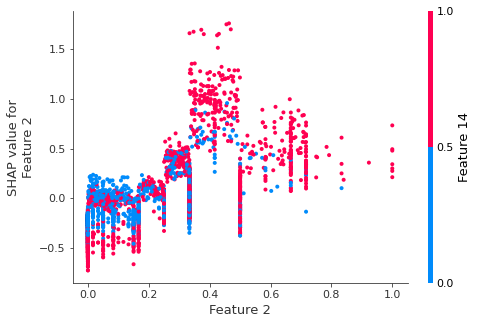

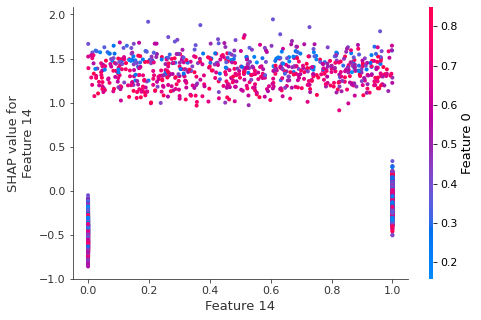

In [ ]:
top_vars = ['Feature 0', 'Feature 1', 'Feature 13', 'Feature 2','Feature 14']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train, X_train)